In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

# Metody statystyczne - Zestaw 1
### Autor: Konrad Ulman

## Problem A1

### Implementacja generatora liczb losowych z rozkładu normalnego  $ N(\mu, \sigma^2)$ metodą polarną

$ \mu = 0 $ - wartość oczekiwana, 

$ \sigma^2 = 1 $ - wariancja
    


In [2]:
N = 1000000
bins = 1000

In [3]:
def polar(mu, sigma):    
    u = v = s = None
    
    while True:
        u = rand.random() * 2 - 1
        v = rand.random() * 2 - 1
        s = u * u + v * v
        
        if s < 1 and s is not 0:
            break
            
    s = np.sqrt( -2.0 * np.log(s) / s )
    
    return mu + sigma * u * s 

### Histogram i porównanie ze wzorem analitycznym

\begin{equation}
  f(y) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \dfrac{(y - \mu)^2}{2\sigma^2}}
\end{equation}

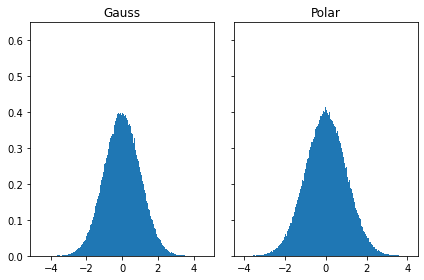

In [4]:
def run_method(n, f, *args):
    return [f(*args) for _ in range(n)]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')

axs[1].hist(run_method(N, polar, 0, 1), density=True, bins=bins)
axs[1].title.set_text('Polar')

plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

### Obliczyć eksperymentalne znaczenia dla wartości średniej oraz wariancji

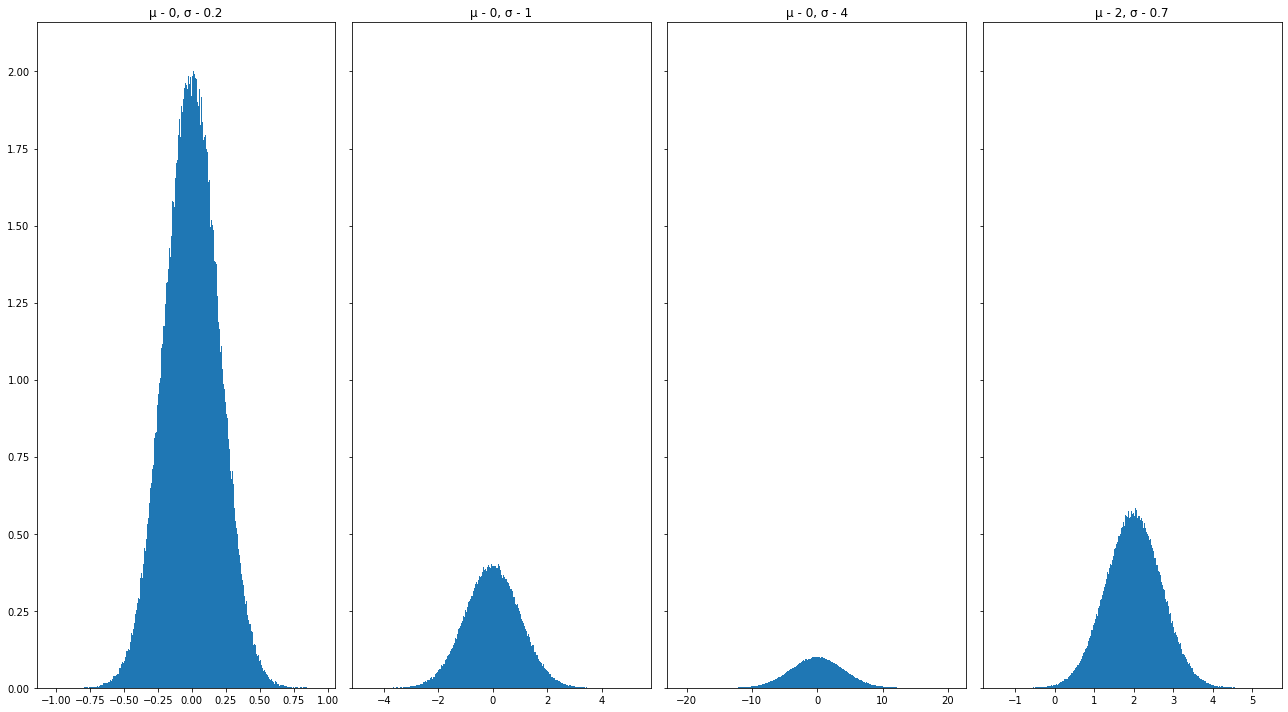

In [5]:
class Arg:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

def plot_polar_args(args: list):
    fig, axs = plt.subplots(1, len(args), sharey=True, tight_layout=True)
    fig.set_size_inches(18, 10, forward=True)
    
    for i, arg in enumerate(args):
        axs[i].hist(run_method(N, polar, arg.mu, arg.sigma), density=True, bins=bins)
        axs[i].title.set_text(f'μ - {arg.mu}, σ - {arg.sigma}')

    plt.show()
    
plot_polar_args([Arg(0, 0.2), Arg(0, 1), Arg(0, 4), Arg(2, 0.7)])

## Problem A2

### Implementacja generatora liczb losowych z rozkładu Cauchy'ego  $ C(y_0, \gamma)$, metodą odwróconej dystrybuanty

\begin{equation}
  f(y) = \dfrac{1}{ \pi \gamma [ 1 + ( \dfrac{y - y_0}{\gamma} )^2 ]}, y \in (-\infty, \infty)
\end{equation}


In [6]:
def cauchy(y = 0, scale = 1):
    return  1 / ( np.pi * scale * ( 1 + ( ( y - rand.uniform(-0.5, 0.5) ) / scale )**2 ) )

### Histogram i porównanie ze wzorem analitycznym dla różnych $ y_0, \gamma $

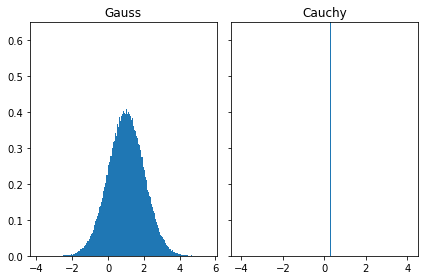

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(1 - np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')

axs[1].hist(run_method(N, cauchy, 0, 1) , density=True, bins=bins)
axs[1].title.set_text('Cauchy')

plt.plot()
plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

## Problem B

### Ruina gracza dla 2 graczy A, B

In [25]:
def gamblers_ruin(number_of_games, a_balance, b_balance, prob, bet = 1):
    a_wins = [False] * number_of_games
    game_counter = [0] * number_of_games
    
    for i in range(number_of_games):
        p1b = a_balance
        p2b = b_balance

        while p1b > 0 and p2b > 0:
            game_counter[i] += 1
            
            p1_win = np.random.uniform(0, 1) < prob
            

            p1b = p1b + bet if p1_win else p1b - bet

            p2b = p2b - bet if p1_win else p2b + bet
        
        a_wins[i] = p1b > 0
        
    return a_wins, game_counter

### Kapitały początkowe A,B:
$ a = 50; b = 50 $

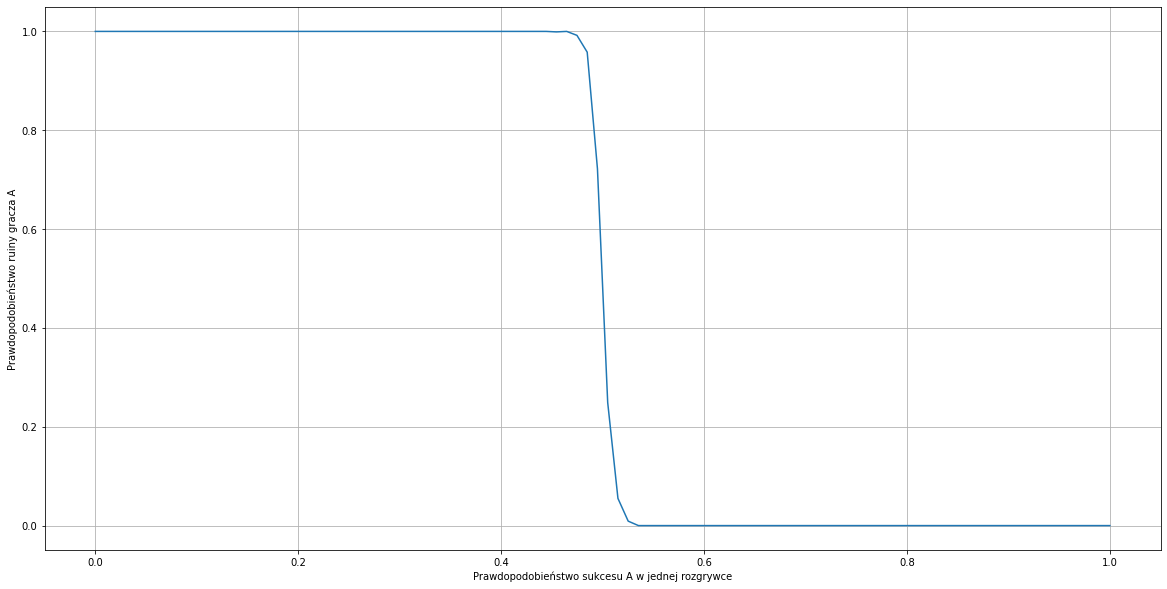

In [26]:
number_of_simulations = 1
number_of_games = 1000

for i in range(number_of_simulations):
    x = []
    y = []

    for i in np.linspace(0.0, 1.0, 100):
        a_wins, game_counter = gamblers_ruin(number_of_games, 50, 50, i, 1)
        x.append(i)
        y.append(1 - sum(a_wins)/number_of_games)
    
    plt.plot(x, y)
    
plt.rcParams["figure.figsize"]=(20, 10)
plt.grid()
plt.xlabel('Prawdopodobieństwo sukcesu A w jednej rozgrywce')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')

plt.show()

### Porównanie z wynikiem analitycznym dla różnych $p_A$

In [22]:
def b_ruin(a, z, p):
    if p is 0.5:
        return 1 - a/z
    
    qp = ( 1 - p ) / p
    v1 = 1 - qp**a
    v2 = 1 - qp**z
    return v1 / v2

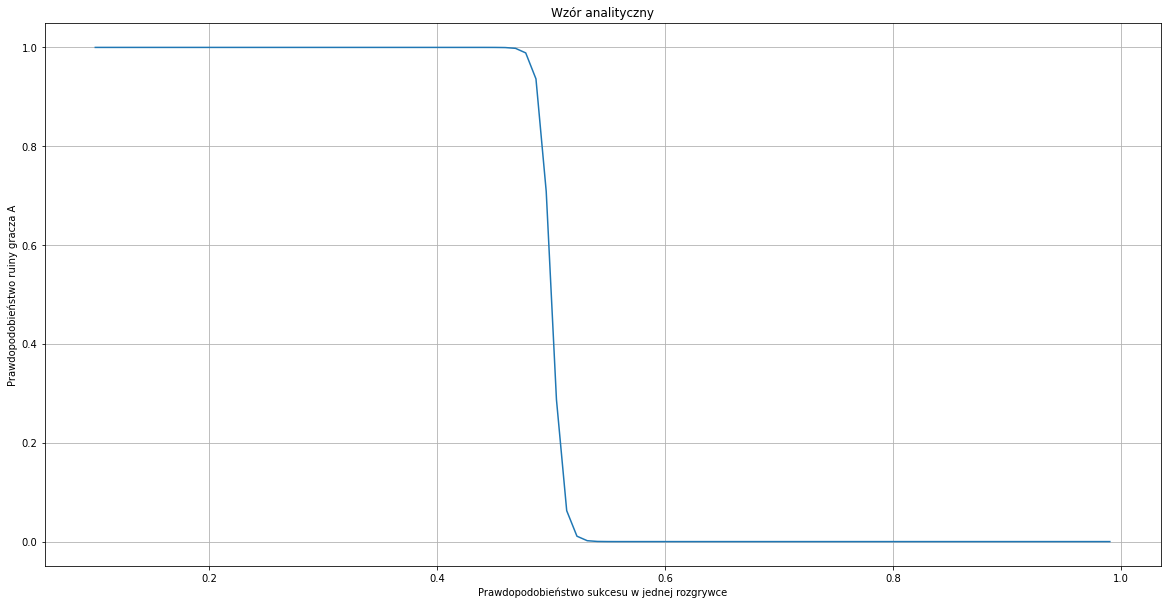

In [23]:
number_of_games = 100

a_ruined = []
x = []

for i in np.linspace(0.1, 0.99, 100):
    ruin_b = b_ruin(50, 100, i)
    a_ruined.append( 1 - ruin_b)
    x.append(i)

plt.plot(x, a_ruined)
plt.grid()
plt.rcParams["figure.figsize"]=(20, 10)
plt.title('Wzór analityczny')
plt.xlabel('Prawdopodobieństwo sukcesu w jednej rozgrywce')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')

plt.show()

## Problem C

### Ruina gracza dla 2 graczy A, B

$ a + b = 100; \,\, p_a = \dfrac{1}{2} $

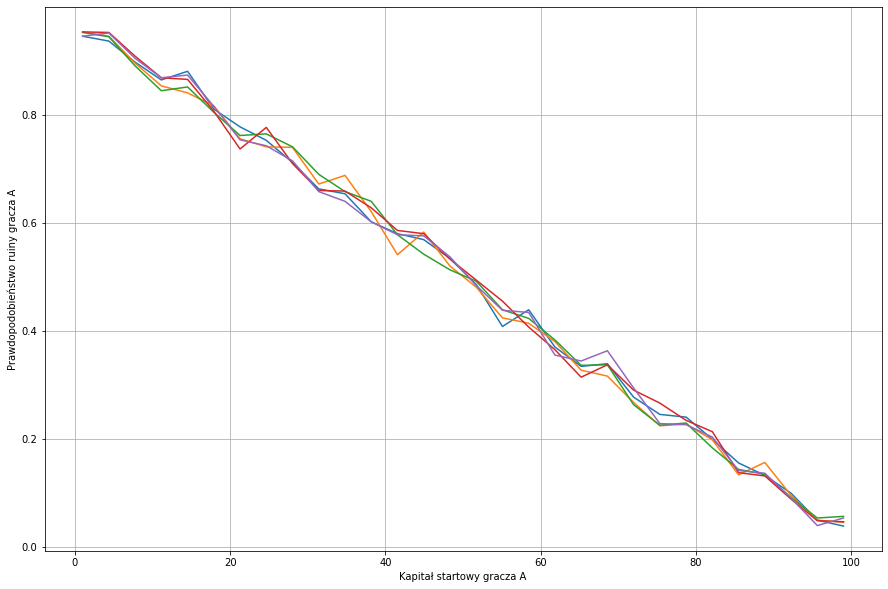

In [12]:
number_of_simulations = 5
number_of_games = 1000

for i in range(number_of_simulations):
    x = []
    y = []

    for i in np.linspace(1, 99, 30):
        a_wins, game_counter = gamblers_ruin(number_of_games, i, 100 - i, 0.5, 5)
        x.append(i)
        y.append(1 - sum(a_wins)/number_of_games)

    plt.plot(x, y)
    
plt.rcParams["figure.figsize"]=(20, 10)
plt.grid()
plt.xlabel('Kapitał startowy gracza A')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')

plt.show()

### Porównanie ze wzorem analitycznym

In [13]:
def b_ruin(a, z):
    return 1 - a/z

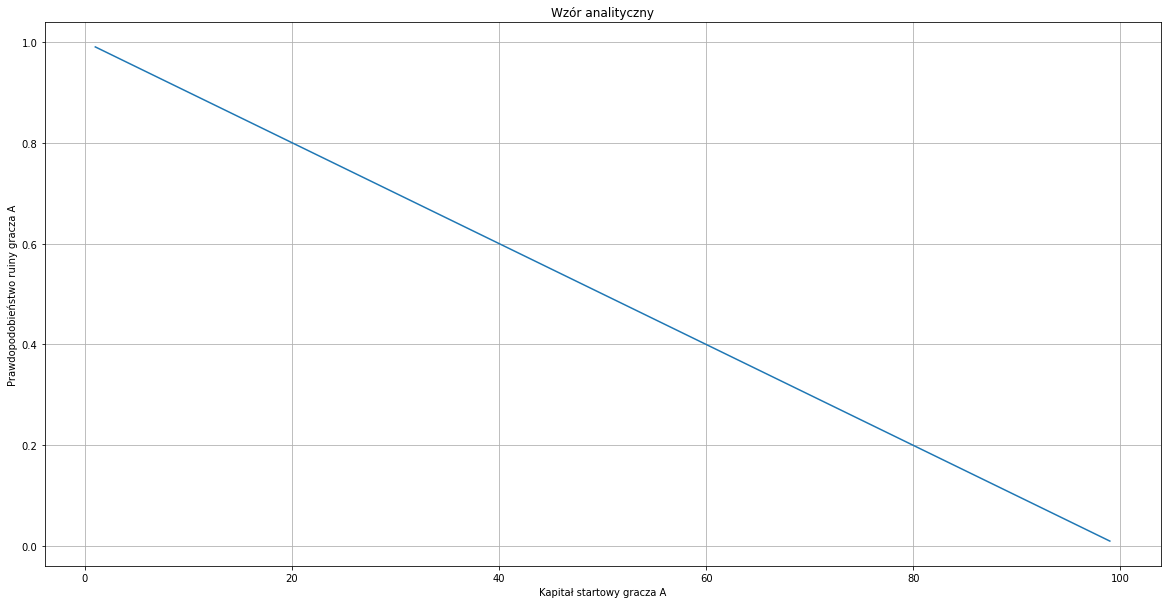

In [14]:
number_of_simulations = 5
number_of_games = 100
b_ruined = []

for i in np.linspace(1, 99, 99):
    ruin_b = b_ruin(i, 100)
    b_ruined.append(ruin_b)
    
plt.plot(np.linspace(1, 99, 99), b_ruined)
plt.grid()
plt.title('Wzór analityczny')
plt.xlabel('Kapitał startowy gracza A')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')

plt.show()

## Problem D

### Liczba rozgrywek do ukończenia gry oraz średnia długość rozgrywki

\begin{equation}
  p_A = \dfrac{1}{2}, \dfrac{1}{5}, \dfrac{4}{5}; \, a = b = 50; \, liczba \, gier = 20000
\end{equation}

In [15]:
def gamblers_ruin(number_of_games, a_balance, b_balance, prob, bet = 1):
    a_wins = [0] * number_of_games
    game_counter = [0] * number_of_games
    
    for i in range(number_of_games):
        p1b = a_balance
        p2b = b_balance

        while p1b > 0 and p2b > 0:
            game_counter[i] += 1
            
            p1_win = np.random.uniform(0, 1) < prob
            a_wins[i] += p1_win

            p1b = p1b + bet if p1_win else p1b - bet

            p2b = p2b - bet if p1_win else p2b + bet
        
    return a_wins, game_counter

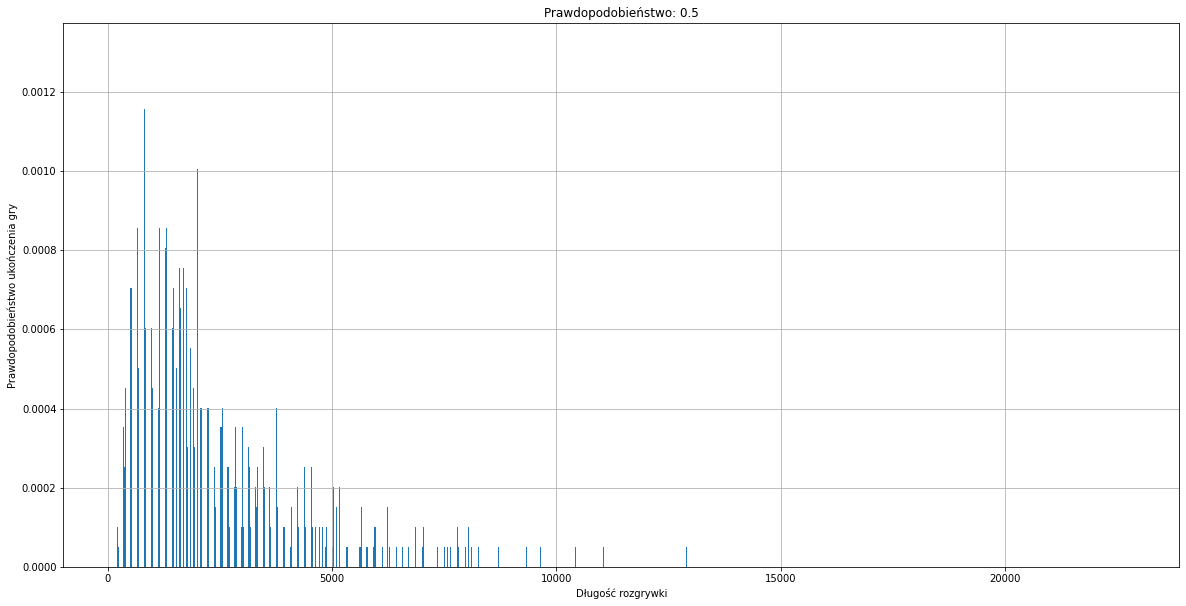

Średnia długość rozgrywki: 2460.1436


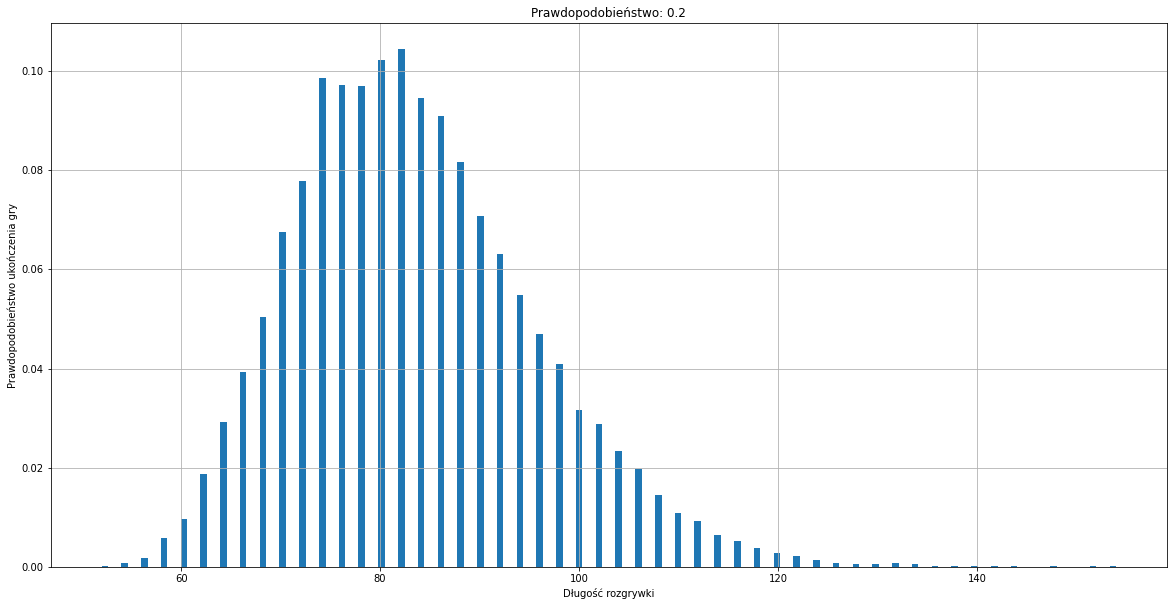

Średnia długość rozgrywki: 83.3796


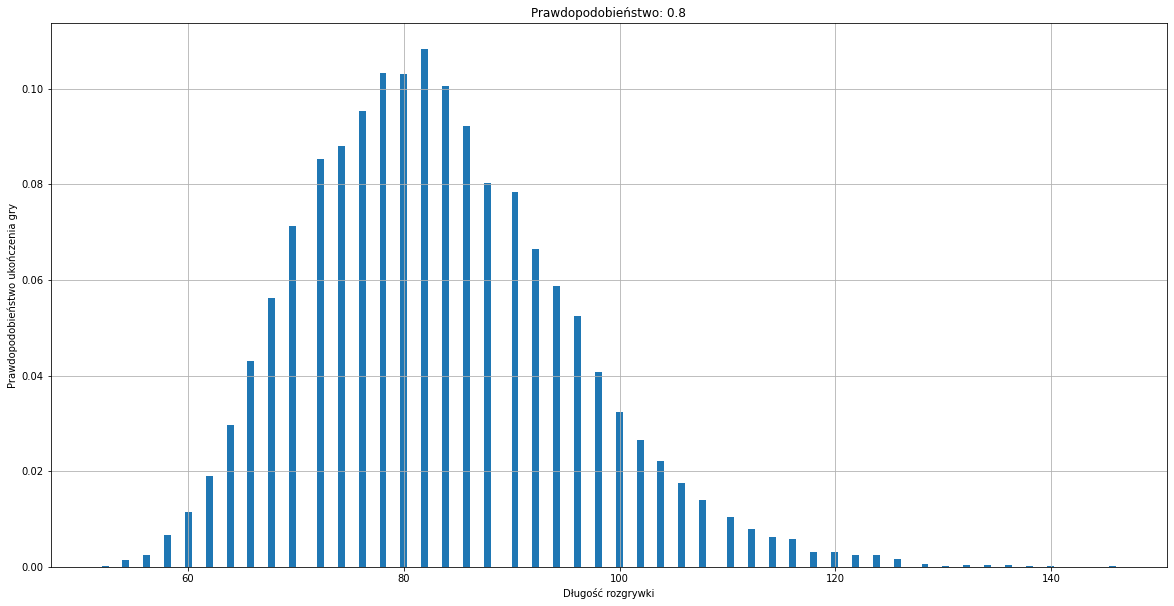

Średnia długość rozgrywki: 83.1897


In [16]:
prob = (0.5, 0.2, 0.8)
number_of_games = 20000

for i in prob:
    a_wins, game_counter = gamblers_ruin(number_of_games, 50, 50, i, 1)    
    plt.hist(game_counter, density=True, bins=max(game_counter))
    plt.grid()
    plt.title(f'Prawdopodobieństwo: {i}')
    plt.xlabel('Długość rozgrywki')
    plt.ylabel('Prawdopodobieństwo ukończenia gry')
    plt.rcParams["figure.figsize"]=(20, 10)
    plt.show()
    print(f'Średnia długość rozgrywki: {sum(game_counter)/number_of_games}')

## Problem G

### Trajektoria liczby wygranych gier dla 1 z 2 graczy 

In [17]:
def gamblers_ruin_wins(number_of_games, a_balance, b_balance, prob, bet = 1):
    a_wins = [False] * number_of_games
    game_counter = [0] * number_of_games
    
    for i in range(number_of_games):
        p1b = a_balance
        p2b = b_balance

        while p1b > 0 and p2b > 0:
            game_counter[i] += 1
            
            p1_win = np.random.uniform(0, 1) < prob

            p1b = p1b + bet if p1_win else p1b - bet

            p2b = p2b - bet if p1_win else p2b + bet
     
        a_wins[i] = p1b > 0
        
    return a_wins, game_counter

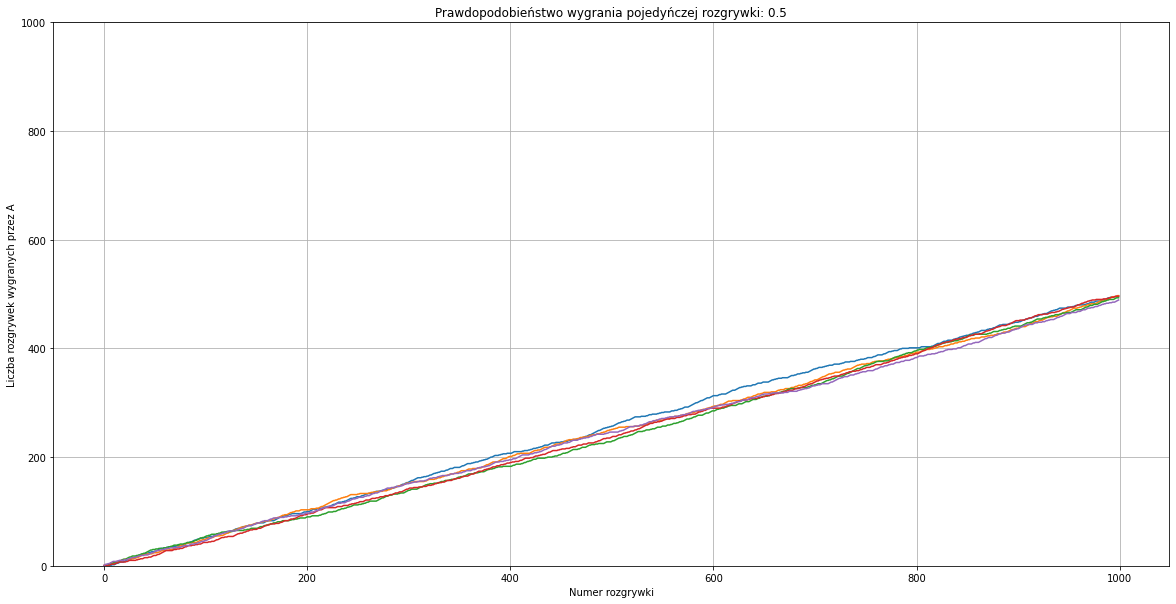

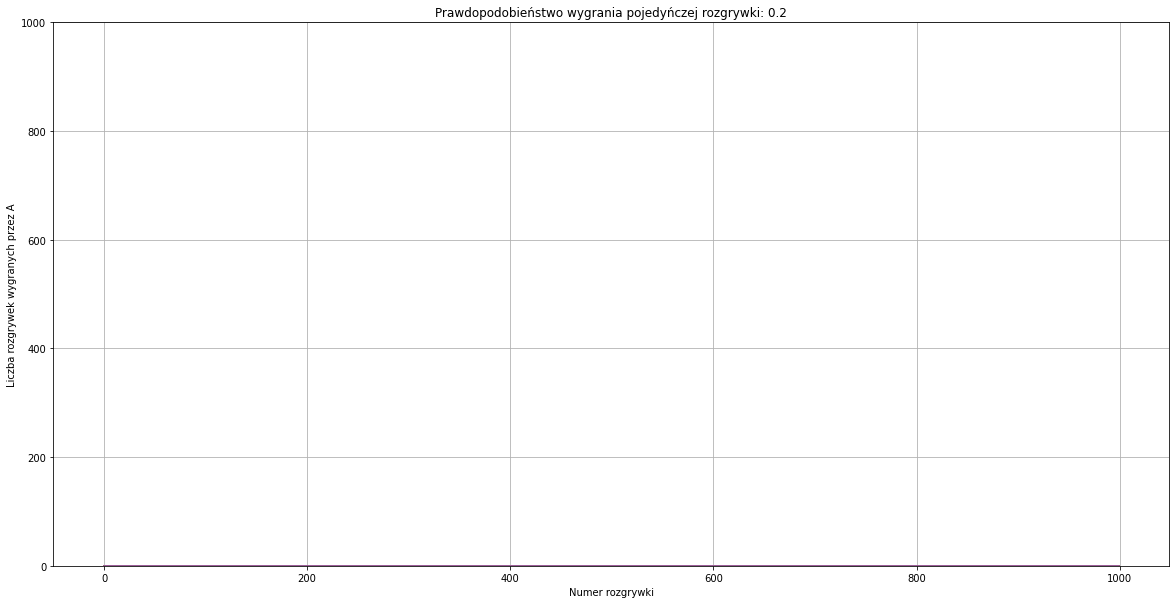

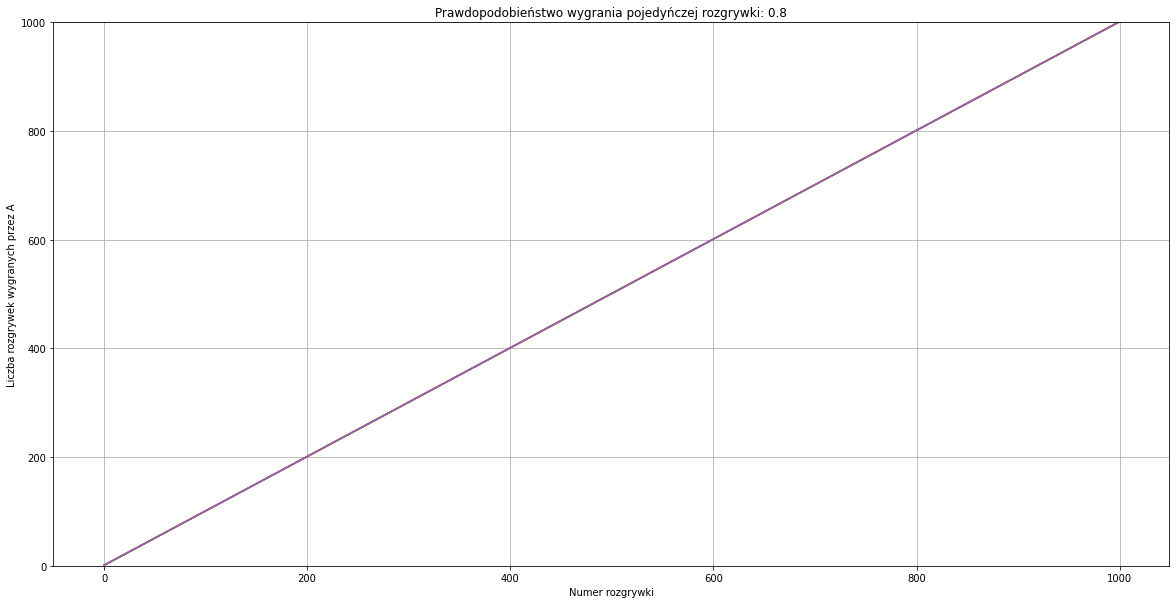

In [18]:
number_of_games = 1000
number_of_simulations = 5
prob = (0.5, 0.2, 0.8)

for i in prob:
    for s in range(number_of_simulations):
        a_wins, game_counter = gamblers_ruin_wins(number_of_games, 50, 50, i, 1)
        
        plt.plot(range(number_of_games), np.cumsum(a_wins))
    
    plt.grid()
    plt.ylim(0, number_of_games)
    plt.title(f'Prawdopodobieństwo wygrania pojedyńczej rozgrywki: {i}')
    plt.xlabel('Numer rozgrywki')
    plt.ylabel('Liczba rozgrywek wygranych przez A')
    
    plt.show()

### Trajektoria kapitału dla 1 z 2 graczy 

In [19]:
def gamblers_ruin_balance(a_balance, b_balance, prob, bet = 1):
    game_counter = 0
    a_wins = []
    a_b = []
    
    while a_balance > 0 and b_balance > 0:
        p1_win = np.random.uniform(0, 1) < prob

        a_balance = a_balance + bet if p1_win else a_balance - bet

        b_balance = b_balance - bet if p1_win else b_balance + bet
        
        a_wins.append(p1_win)
        a_b.append(a_balance)
        game_counter += 1
        
    return a_wins,game_counter,a_b

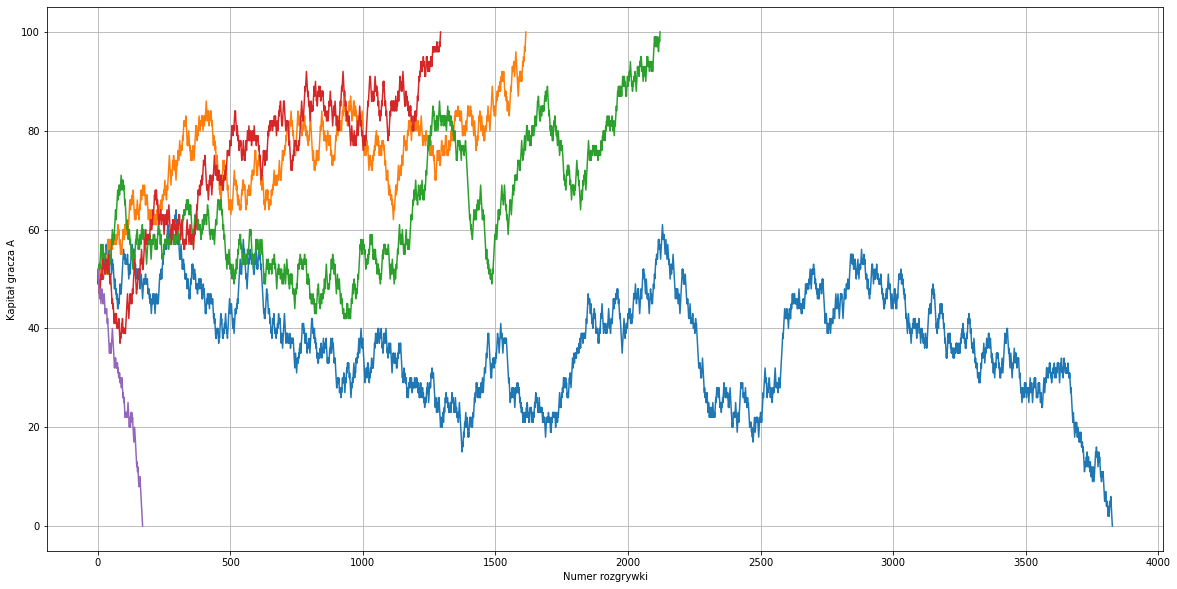

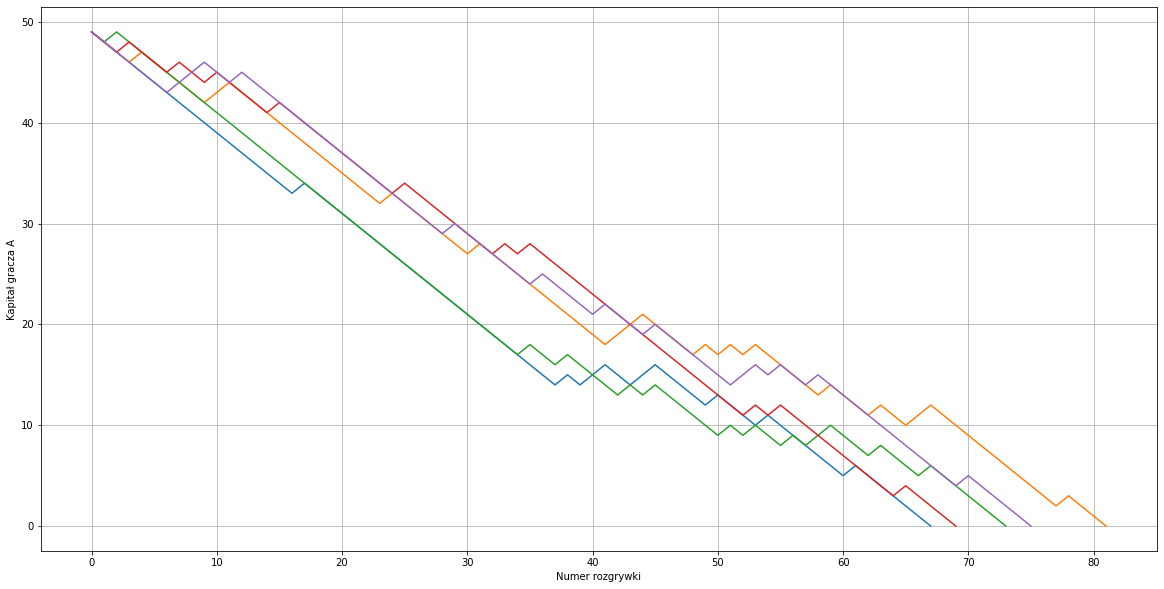

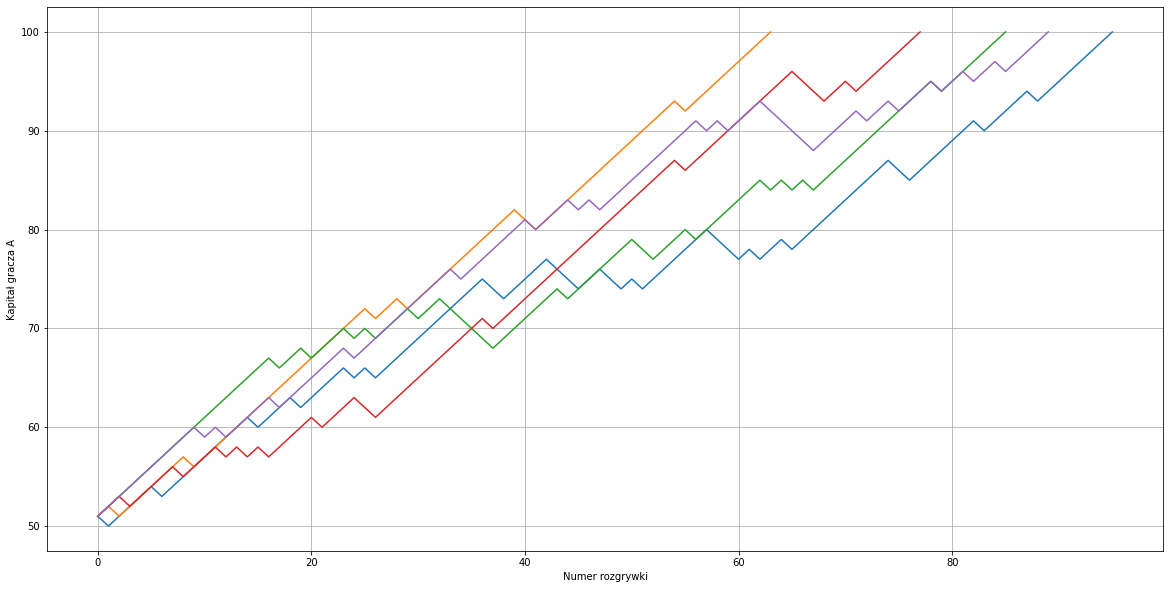

In [20]:
prob = (0.5, 0.2, 0.8)
number_of_simulations = 5

for i in prob:
    for s in range(number_of_simulations):
        a_wins, number_of_games, a_balances = gamblers_ruin_balance(50, 50, i)
        plt.plot(range(number_of_games), a_balances)
       
    plt.rcParams["figure.figsize"]=(20, 10)
    plt.grid()
    plt.xlabel('Numer rozgrywki')
    plt.ylabel('Kapitał gracza A')
    plt.show()
    
